<a href="https://colab.research.google.com/github/GledisUA/CLASE-3-DE-ESTAD-STICA/blob/main/Lab12_GledisAcosta_PruebaDeColaInferior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba de cola inferior**
## **Por Gledis Acosta**


---

## 💊 Evaluación de un Medicamento para la Presión Arterial

### **Ejercicio ilustrativo: Planteamiento del Problema**

Se desea determinar si un nuevo medicamento **reduce la presión arterial sistólica**. Se mide la presión de 8 pacientes **antes y después** del tratamiento y se calcula la diferencia (Después - Antes).

Se conoce:

* Media de las diferencias: $\bar{d} = -2.5$ mmHg
* Desviación estándar de las diferencias: $s_d = 1.5$ mmHg
* Tamaño de la muestra: $n = 8$
* Nivel de significancia: $\alpha = 0.05$

---

### **Paso 1: Hipótesis**

* **Hipótesis nula (H₀):** El medicamento no reduce la presión arterial.
  $H_0: \mu_d \geq 0$

* **Hipótesis alternativa (H₁):** El medicamento reduce la presión arterial.
  $H_1: \mu_d < 0$

> Es una **prueba t para muestras pareadas (una cola a la izquierda)**.

---

### **Paso 2: Estadístico de prueba**

La fórmula del estadístico t es:

$$
t = \frac{\bar{d} - \mu_0}{s_d / \sqrt{n}} = \frac{-2.5 - 0}{1.5 / \sqrt{8}} = \frac{-2.5}{0.5303} \approx -4.714
$$

---

### **Paso 3: Valor crítico**

Grados de libertad: $gl = n - 1 = 7$

Valor crítico para $\alpha = 0.05$, una cola:

$$
t_{0.05, 7} \approx -1.895
$$

---

### **Paso 4: Decisión**

Comparando el valor calculado:

$$
t = -4.714 < -1.895
$$

✅ **Rechazamos la hipótesis nula**.

---

### 📌 **Conclusión final**

A un nivel de significancia del 5%, hay **evidencia suficiente para afirmar que el medicamento reduce la presión arterial sistólica** en los pacientes evaluados.

---


In [2]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython
#%%R

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## **Usando R en Colab**

Estadístico t: -4.714 
Valor p: 0.001086 
Rechazamos la hipótesis nula.


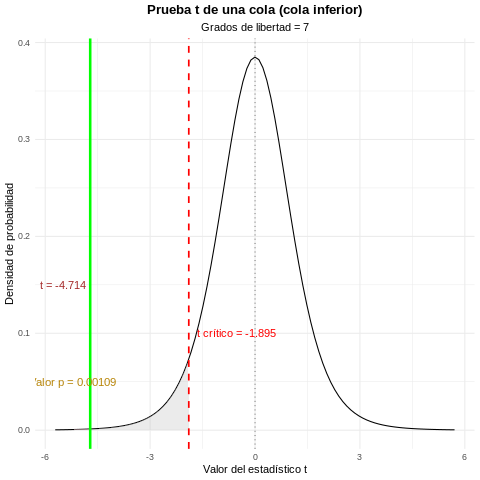

In [4]:
%%R
# Datos resumidos
media_d <- -2.5
sd_d <- 1.5
n <- 8
alfa <- 0.05
gl <- n - 1

# Calcular el estadístico de prueba t
t_estadistico <- (media_d - 0) / (sd_d / sqrt(n))
cat("Estadístico t:", round(t_estadistico, 4), "\n")
# Calcular el valor p (prueba de cola inferior)
p_valor <- pt(t_estadistico, df = gl, lower.tail = TRUE)
cat("Valor p:", format.pval(p_valor, digits = 4), "\n")
# Decisión
if (p_valor <= alfa) {
  cat("Rechazamos la hipótesis nula.\n")
} else {
  cat("No rechazamos la hipótesis nula.\n")
}
# Visualización mejorada
library(ggplot2)

# Calculamos valores importantes
t_critico <- qt(alfa, df = gl)
x_vals <- seq(min(-4, t_estadistico - 1), max(4, abs(t_estadistico) + 1), 0.01)

ggplot(data.frame(x = x_vals), aes(x = x)) +
  # Distribución base
  stat_function(fun = dt, args = list(df = gl)) +

  # Región crítica (roja)
  geom_area(data = subset(data.frame(x = x_vals), x < t_critico),
            aes(y = dt(x, df = gl)), fill = "gray", alpha = 0.3) +

  # Valor p (amarillo)
  geom_area(data = subset(data.frame(x = x_vals), x < t_estadistico),
            aes(y = dt(x, df = gl)), fill = "pink", alpha = 0.3) +

  # Líneas de referencia
  geom_vline(xintercept = t_critico, linetype = "dashed", color = "red", linewidth = 0.8) +
  geom_vline(xintercept = t_estadistico, color = "green", linewidth = 1.2) +
  geom_vline(xintercept = 0, color = "gray50", linetype = "dotted") +

  # Anotaciones
  annotate("text", x = t_critico, y = 0.1,
           label = paste("t crítico =", round(t_critico, 3)),
           color = "red", hjust = -0.1) +

  annotate("text", x = t_estadistico, y = 0.15,
           label = paste("t =", round(t_estadistico, 3)),
           color = "brown", hjust = 1.1) +

  annotate("text", x = mean(c(min(x_vals), t_estadistico)), y = 0.05,
           label = paste("Valor p =", format.pval(p_valor, digits = 3)),
           color = "darkgoldenrod", size = 4) +

  # Configuración del gráfico
  labs(title = "Prueba t de una cola (cola inferior)",
       subtitle = paste("Grados de libertad =", gl),
       x = "Valor del estadístico t",
       y = "Densidad de probabilidad") +

  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

## **Usando Python**

Estadístico t: -4.714
Valor p: 0.0011
Rechazamos la hipótesis nula.


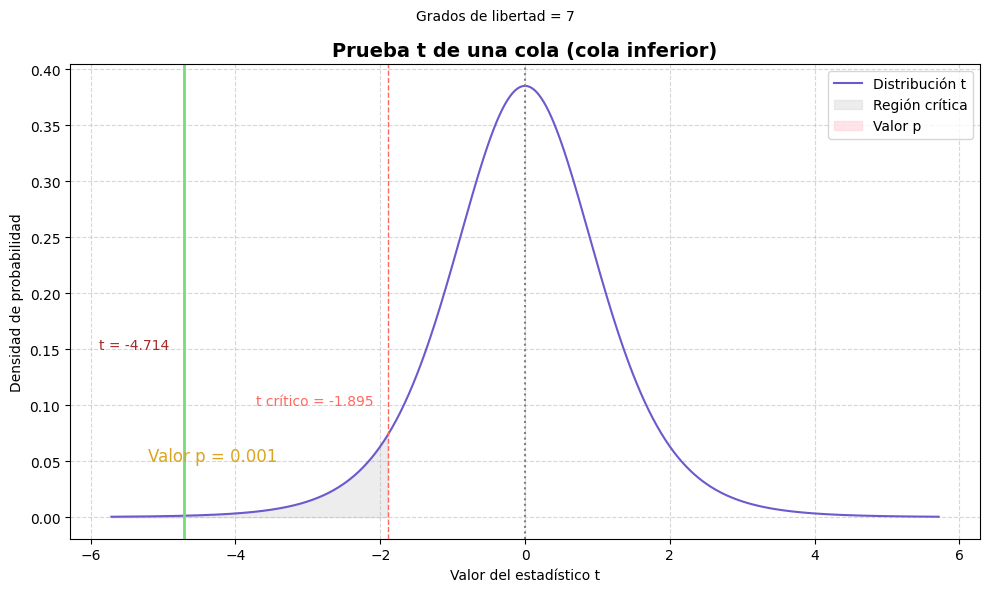

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos resumidos
media_d = -2.5
sd_d = 1.5
n = 8
alfa = 0.05
gl = n - 1

# Cálculo del estadístico t
t_estadistico = (media_d - 0) / (sd_d / np.sqrt(n))
print(f"Estadístico t: {round(t_estadistico, 4)}")

# Valor p (cola inferior)
p_valor = stats.t.cdf(t_estadistico, df=gl)
print(f"Valor p: {round(p_valor, 4)}")

# Decisión
if p_valor <= alfa:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

# Visualización
t_critico = stats.t.ppf(alfa, df=gl)
x_vals = np.linspace(min(-4, t_estadistico - 1), max(4, abs(t_estadistico) + 1), 1000)
y_vals = stats.t.pdf(x_vals, df=gl)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color="slateblue", label="Distribución t")

# Región crítica (gris pastel)
plt.fill_between(x_vals, 0, y_vals, where=(x_vals < t_critico),
                 color="#D3D3D3", alpha=0.4, label="Región crítica")

# Valor p (rosado pastel)
plt.fill_between(x_vals, 0, y_vals, where=(x_vals < t_estadistico),
                 color="#FFC0CB", alpha=0.4, label="Valor p")

# Líneas de referencia
plt.axvline(t_critico, linestyle="--", color="#FF6961", linewidth=1)
plt.axvline(t_estadistico, color="#77DD77", linewidth=2)
plt.axvline(0, linestyle=":", color="gray")

# Anotaciones
plt.text(t_critico - 0.2, 0.1, f"t crítico = {round(t_critico, 3)}", color="#FF6961", ha='right')
plt.text(t_estadistico - 0.2, 0.15, f"t = {round(t_estadistico, 3)}", color="brown", ha='right')
plt.text((min(x_vals) + t_estadistico) / 2, 0.05,
         f"Valor p = {round(p_valor, 3)}", color="goldenrod", fontsize=12)

# Etiquetas y estilo
plt.title("Prueba t de una cola (cola inferior)", fontsize=14, weight='bold')
plt.suptitle(f"Grados de libertad = {gl}", fontsize=10)
plt.xlabel("Valor del estadístico t")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
